In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
img_h,img_w = 1200,600

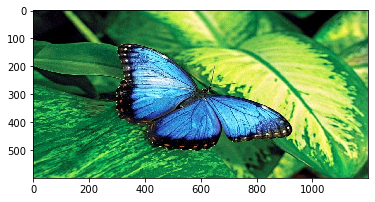

In [3]:
img = cv2.cvtColor(cv2.imread('Butterfly.jpg'),cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(img_h,img_w))
plt.imshow(img)
plt.show()

In [4]:
pixel_val = np.reshape(img,(-1,3))
#pixel_val = np.float32(pixel_val)

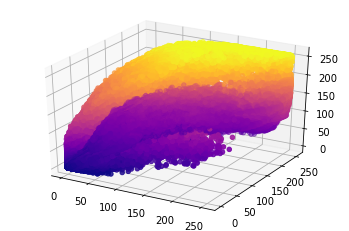

array([12, 10, 15], dtype=uint8)

In [5]:
fig = plt.figure()
ax = plt.axes(projection="3d")
x_points = pixel_val[:,0]
y_points = pixel_val[:,1]
z_points = pixel_val[:,2]
ax.scatter3D(x_points,y_points,z_points,c=z_points,cmap='plasma')
plt.show()
pixel_val[1,:]


In [6]:
class K_Means:
    # Initialize k(number of centroids) and datas
    def __init__(self , k , datas):
        self.k=k
        self.datas = datas
        self.rows = self.datas.shape[0]
        
        self.centroids = []
        for i in range (self.k):
            self.centroids.append(self.datas[i,:])
        print(self.centroids)
            
        self.last_centroids = None
        self.distance = np.empty((self.rows,self.k))
        self.centroids = np.asarray(self.centroids , dtype = np.float32)

    def calc_dist(self,x,C):
        #to calculate the euclidian distance between every point to every centroids
        return np.linalg.norm(x-C,axis = 1)
    
    def __call__(self):
        
        while True:
            #Loop through every datas and calculate their distance between each centroid with each data points
            #Note: Centroids is a list containing k number of points
            for row in range(self.rows):           
                self.distance[row]= self.calc_dist(self.datas[row],self.centroids)
            print(self.distance.shape[0])
            print(self.distance)
            # nearest_centroids accept the minimum value inside centroids list
            self.nearest_centroids = np.argmin(self.distance , axis = 1)
            print(self.nearest_centroids.shape[0])
            print(self.nearest_centroids)
            # break if the same centroids is chosen
            if(self.last_centroids==self.nearest_centroids).all():
                break
            #calculate mean of each data point with centroid which contains the min distance
            for cluster in range(self.k):
                mean = np.mean(self.datas[self.nearest_centroids == cluster],axis = 0)
                self.centroids[cluster]= mean
                
               
            # keep track of centroids
            self.last_centroids= self.nearest_centroids
            
        return (self.nearest_centroids , self.centroids)
                
                
                

In [7]:
k_means =K_Means(k=5, datas= pixel_val)
centroid_index,centroids = k_means()

[array([13, 11, 16], dtype=uint8), array([12, 10, 15], dtype=uint8), array([10,  8, 13], dtype=uint8), array([ 8,  6, 11], dtype=uint8), array([6, 4, 9], dtype=uint8)]
720000
[[  0.           1.73205078   5.19615221   8.66025448  12.12435532]
 [  1.73205078   0.           3.46410155   6.92820311  10.39230442]
 [  5.19615221   3.46410155   0.           3.46410155   6.92820311]
 ...
 [134.27210999 135.75714111 138.74436951 141.75331116 144.78259277]
 [132.79307556 134.27210999 137.24795532 140.24621582 143.26548767]
 [132.79307556 134.27210999 137.24795532 140.24621582 143.26548767]]
720000
[0 1 2 ... 0 0 0]
720000
[[171.35522461   4.19249678   6.04830408   9.14094162  18.8176651 ]
 [172.99101257   3.53739977   4.52852154   7.4476819   17.09955406]
 [176.26812744   4.51503468   2.52161741   4.15815735  13.67388535]
 ...
 [ 49.09965897 134.70321655 137.9263916  141.24772644 149.72245789]
 [ 50.75486374 133.19869995 136.41706848 139.73127747 148.17930603]
 [ 50.75486374 133.19869995 136.41

720000
[[296.82958984 265.34350586 161.35836792  93.72418976   6.04495907]
 [298.47335815 266.96102905 162.85964966  95.12505341   7.13221788]
 [301.7638855  270.2003479  165.87571716  97.95857239   9.87535   ]
 ...
 [184.96975708 164.15614319  27.27798462  44.33733368 128.90675354]
 [186.53245544 165.56044006  28.85884285  42.80597687 127.40987396]
 [186.53245544 165.56044006  28.85884285  42.80597687 127.40987396]]
720000
[4 4 4 ... 2 2 2]
720000
[[299.15814209 266.29754639 169.34608459  99.66201019   7.70249414]
 [300.80233765 267.91525269 170.8662262  101.05685425   8.95981693]
 [304.09362793 271.15484619 173.91841125 103.87697601  11.83968449]
 ...
 [187.5531311  165.00003052  35.98439407  39.19381332 126.95540619]
 [189.1153717  166.40673828  37.60383987  37.65800476 125.46165466]
 [189.1153717  166.40673828  37.60383987  37.65800476 125.46165466]]
720000
[4 4 4 ... 2 2 2]
720000
[[301.87866211 266.57809448 176.56166077 104.07714081   9.31833172]
 [303.5234375  268.19589233 178.0

720000
[[313.19073486 266.4670105  204.59390259 117.64958954  16.24451447]
 [314.83932495 268.08395386 206.17579651 119.06069183  17.68384361]
 [318.13919067 271.32214355 209.34671021 121.90772247  20.69749832]
 ...
 [202.85505676 165.16879272  77.8237381   23.04848862 118.19893646]
 [204.42002869 166.57455444  79.42498016  21.61608124 116.71257019]
 [204.42002869 166.57455444  79.42498016  21.61608124 116.71257019]]
720000
[4 4 4 ... 3 3 3]
720000
[[313.22036743 266.4670105  204.6693573  117.68482971  16.27232742]
 [314.86898804 268.08395386 206.25132751 119.09598541  17.71175194]
 [318.16888428 271.32214355 209.42240906 121.94312286  20.72537422]
 ...
 [202.88725281 165.16879272  77.91691589  23.0174408  118.17119598]
 [204.45222473 166.57455444  79.51799774  21.58559799 116.68482971]
 [204.45222473 166.57455444  79.51799774  21.58559799 116.68482971]]
720000
[4 4 4 ... 3 3 3]
720000
[[313.24154663 266.46780396 204.72540283 117.71282959  16.29412651]
 [314.89016724 268.08474731 206.3

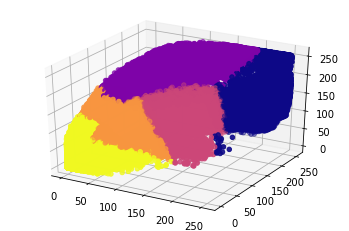

In [8]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
x_points = pixel_val[:,0]
y_points = pixel_val[:,1]
z_points = pixel_val[:,2]
ax.scatter3D(x_points,y_points,z_points,c=centroid_index,cmap='plasma')
plt.show()



In [9]:
new_pixels = np.zeros((img_h*img_w, 3))
#loop only until number of k 
#new_pixels = centroids if only 
for k in range(centroids.shape[0]):
    new_pixels[centroid_index==k] = centroids[k]

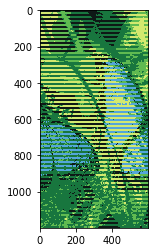

In [10]:
segmented_image = np.reshape(new_pixels, (img_h, img_w, 3))
plt.imshow(segmented_image.astype(np.uint8))
plt.show()
